<a href="https://colab.research.google.com/github/georgekasa/eurobankTrackExpenses/blob/main/expsensesEurobank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!cd sample_data && mkdir expenses

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import calendar
import matplotlib._color_data as mcd

In [ ]:
def cleanNames(nameToClean):
    correctNames = ["ikea", "market in", "lidl", "amazon", "MY MARKET", "AMZN", "skroutz"]
    for correctionInName in correctNames:
        correctionInName = correctionInName.lower()

        if ( correctionInName in nameToClean.lower()):

            if ( "AMZN".lower() in nameToClean.lower()):
                correctionInName = "amazon"

            return correctionInName

    return nameToClean

In [ ]:
!ls

sample_data


In [ ]:
# Directory path
directory_path = r'sample_data/expenses/'
# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

In [ ]:
print(csv_files)

['taxFreeTransactionResultsSep.csv', 'taxFreeTransactionResultsJul.csv', 'taxFreeTransactionResultsAug.csv']


dfData

In [ ]:
dfData = {"category":[], "price":[], "cardNumber":[], "Name":[], "year":[], "month":[], "weekOfMonth":[]}
name_sums = {}  # Dictionary to store the sum of each name
for csv_file in csv_files:
    csv_path = os.path.join(directory_path, csv_file)
    print(csv_path)
    df_excel = pd.read_csv(csv_path, on_bad_lines='skip').dropna()


    for index in range(0, len(df_excel)):
        temp = str(df_excel.iloc[index]).split(";")
        dummy = (temp[6].split(" ")[-1]).split("/")
        dfData["year"].append(dummy[-1])
        dfData["month"].append(dummy[-2])
        dfData["weekOfMonth"].append((float(dummy[-1]) -1) // 8 + 1)
        dfData["Name"].append(cleanNames(temp[8]).upper())
        if ( dfData["Name"][-1] == "amazon".upper()):
            dfData["category"].append("Amazon".upper())
        else:
            dfData["category"].append(temp[7].split("(")[0].upper())

        dfData["cardNumber"].append(temp[9])
        dfData["price"].append(float(temp[10].split(",")[0]) + 0.01*float(temp[5].split(" ")[-1]))

        # Update the name_sums dictionary
        name = dfData["Name"][-1]
        price = dfData["price"][-1]
        if name in name_sums:
            name_sums[name] += price
        else:
            name_sums[name] = price





sample_data/expenses/taxFreeTransactionResultsSep.csv
sample_data/expenses/taxFreeTransactionResultsJul.csv
sample_data/expenses/taxFreeTransactionResultsAug.csv


In [ ]:
month_names = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

In [ ]:
name_month_sums = {}
for i in range(len(dfData["Name"])):
    name = dfData["Name"][i]
    month = dfData["month"][i]
    price = dfData["price"][i]
    if name not in name_month_sums:
        name_month_sums[name] = {}
    if month not in name_month_sums[name]:
        name_month_sums[name][month] = 0
    name_month_sums[name][month] += price

# Process the name_month_sums dictionary
for name, month_sum in name_month_sums.items():
    for month, total_price in month_sum.items():
        print(f" Month: {month_names[int(month) -1]}, {name} , Total Price: {np.round(total_price,2)}")
    print("##############################################")
# Process the name_sums dictionary outside of the loop
# for name, total_price in name_sums.items():
#     print(f"Name: {name}, Total Price: {np.round(total_price,4)}")


 Month: September, GANT MCARTHURGLEN , Total Price: 102.0
##############################################
 Month: September, LIDL , Total Price: 41.09
 Month: July, LIDL , Total Price: 150.38
 Month: August, LIDL , Total Price: 109.36
##############################################
 Month: September, KERATIOTIS ARGYRIOS , Total Price: 23.0
 Month: July, KERATIOTIS ARGYRIOS , Total Price: 85.0
##############################################
 Month: September, COFFEE MAKERS OE , Total Price: 42.8
 Month: July, COFFEE MAKERS OE , Total Price: 4.0
 Month: August, COFFEE MAKERS OE , Total Price: 75.1
##############################################
 Month: September, MASOUTIS KALIVIA ATTI , Total Price: 4.2
##############################################
 Month: September, SKLAVENITIS KALIVIA , Total Price: 3.64
##############################################
 Month: September, APOLLONION_MARKOPOULO , Total Price: 28.81
##############################################
 Month: September, EUROPEAN MIN

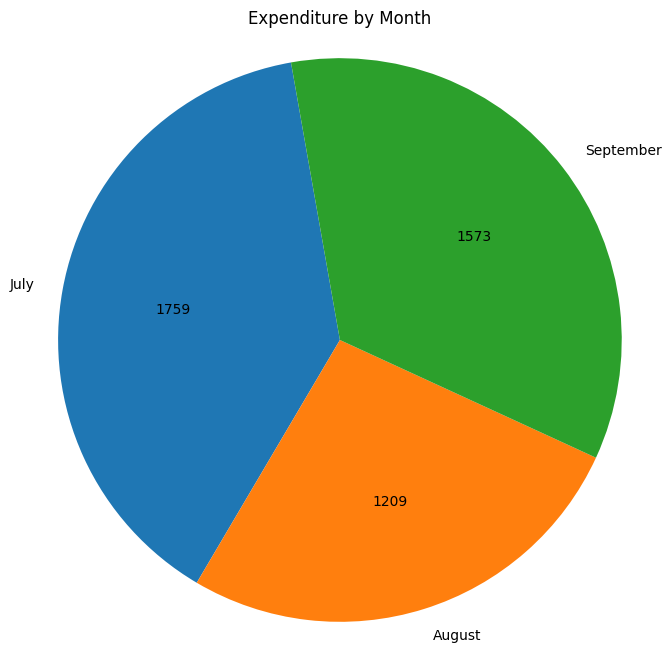

In [ ]:

# Get the full names of the months
month_names = list(calendar.month_name)[1:]

# Create a DataFrame from dfData dictionary
df = pd.DataFrame(dfData)
df["year"] = dfData["year"]#bug?
dummy = []
# Group the data by month and calculate the total expenditure for each month
month_grouped = df.groupby('month')['price'].sum()
for x in month_grouped.index:
  dummy.append(int(x) -1)


# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(month_grouped, labels=[month_names[i] for i in dummy], autopct=lambda x: '{:.0f}'.format(x*month_grouped.sum()/100), startangle=100)
plt.title('Expenditure by Month')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# Show the pie chart
plt.show()


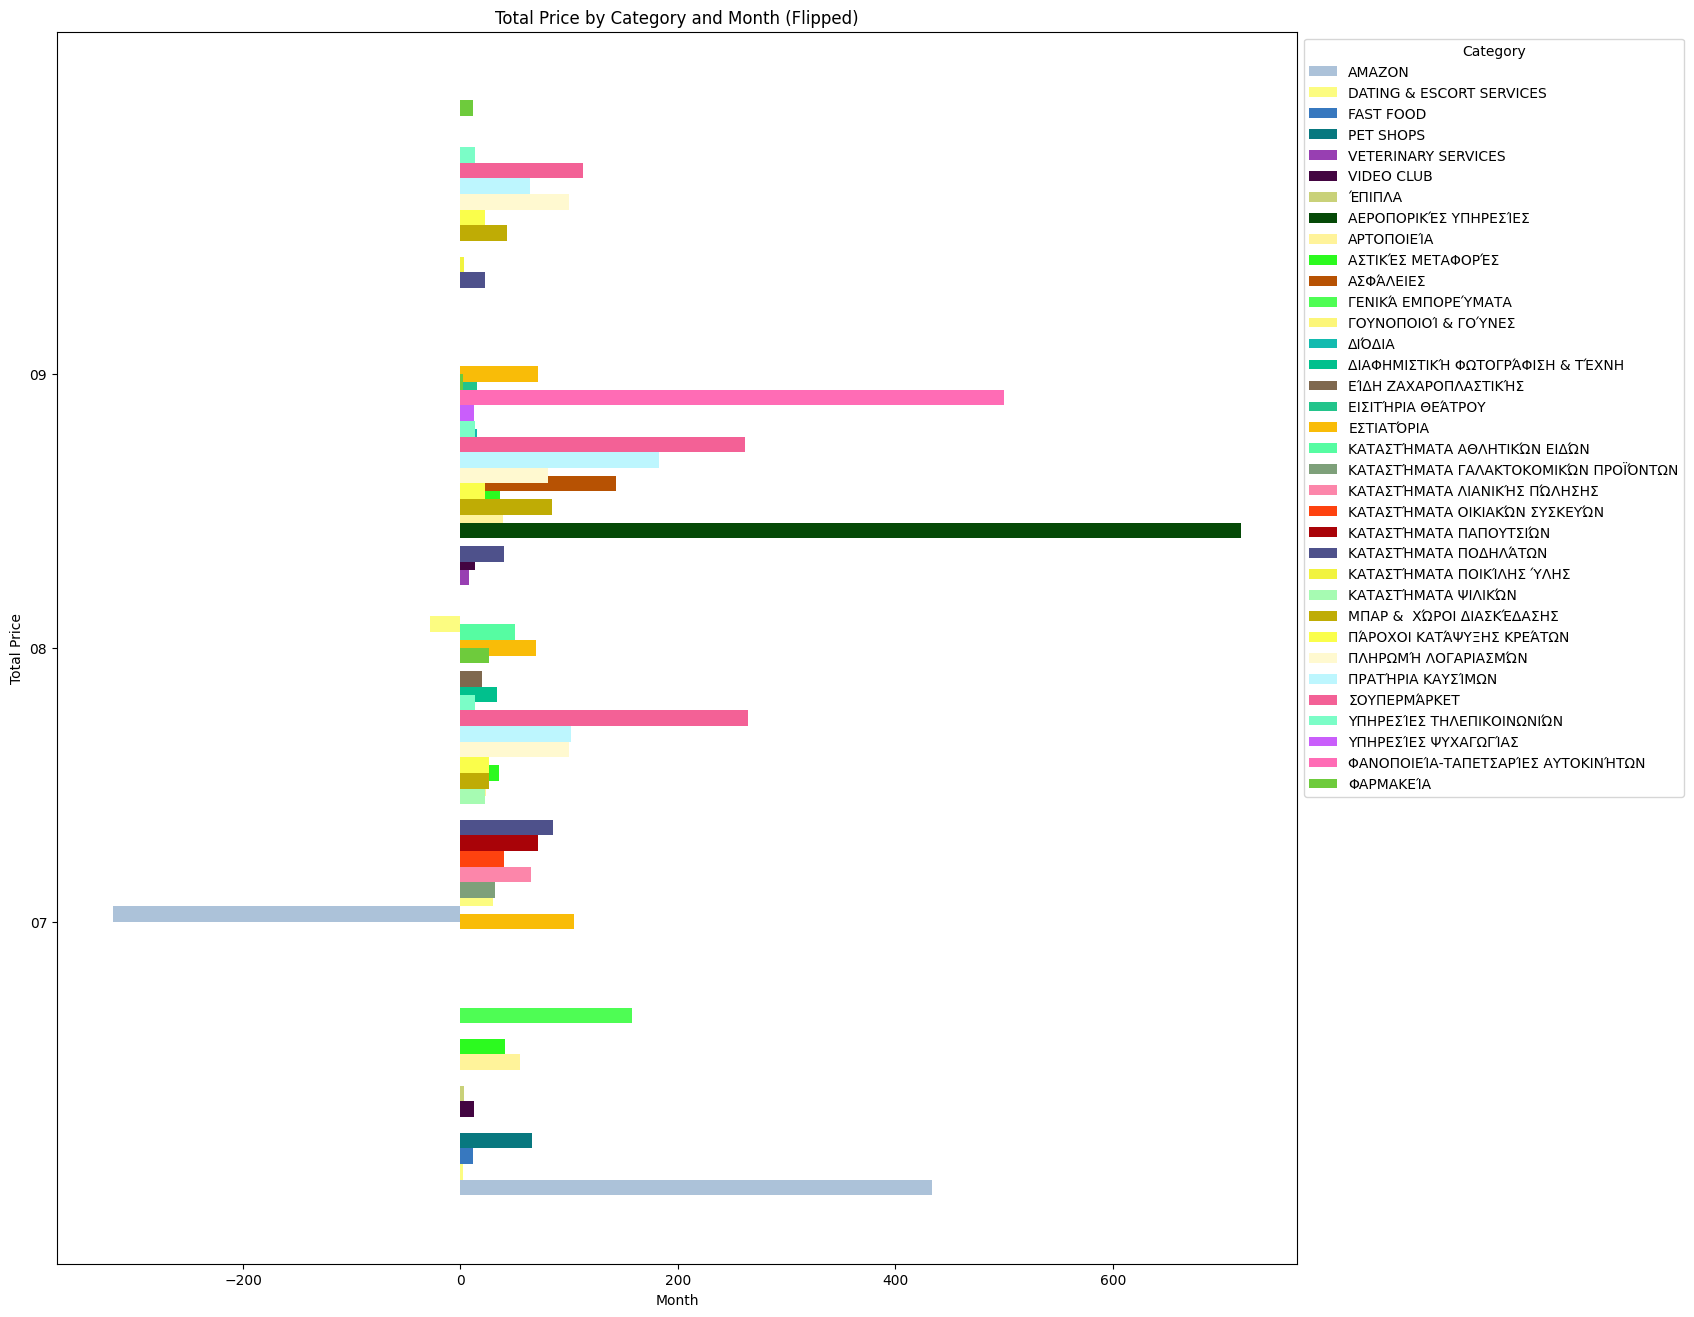

In [ ]:
# Group the data by category and month and calculate the total price for each group
grouped_data = df.groupby(['category', 'month'])['price'].sum().unstack().fillna(0)
# Create a bar plot with categories on the y-axis and months on the x-axis
bar_width = 2  # Adjust the bar width as needed
palette = list(mcd.XKCD_COLORS.values())[::10]
ax = grouped_data.T.plot(kind='barh', figsize=(16, 16), width=bar_width, color=palette)
ax.set_xlabel('Month')
ax.set_ylabel('Total Price')
ax.set_title('Total Price by Category and Month (Flipped)')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
# Sort the DataFrame by year and month
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df = df.sort_values(by=['year', 'month'])

# Group the data by year, month, and category and sum the expenses for the same category
top_x_expenses = 15
top_expenses_by_month = df.groupby(['year', 'month', 'category'])['price'].sum().reset_index()
top_expenses_by_month = top_expenses_by_month.groupby(['year', 'month']).apply(lambda x: x.nlargest(top_x_expenses, 'price')).reset_index(drop=True)

# Iterate through the unique months and print the top expenses for each
unique_months = top_expenses_by_month[['year', 'month']].drop_duplicates()
for index, row in unique_months.iterrows():
    year, month = row['year'], row['month']
    print(f"{calendar.month_name[month]} {year}")
    monthly_top_expenses = top_expenses_by_month[(top_expenses_by_month['year'] == year) & (top_expenses_by_month['month'] == month)]
    for i, row in monthly_top_expenses.iterrows():
        print(f"{i+1}. {row['category']} - ${row['price']:.2f}")
    print()

July 2023
1. AMAZON - $433.62
2. ΣΟΥΠΕΡΜΆΡΚΕΤ - $264.75
3. ΓΕΝΙΚΆ ΕΜΠΟΡΕΎΜΑΤΑ - $157.54
4. ΕΣΤΙΑΤΌΡΙΑ - $104.10
5. ΠΡΑΤΉΡΙΑ ΚΑΥΣΊΜΩΝ - $101.92
6. ΠΛΗΡΩΜΉ ΛΟΓΑΡΙΑΣΜΏΝ  - $100.00
7. ΚΑΤΑΣΤΉΜΑΤΑ ΠΟΔΗΛΆΤΩΝ - $85.00
8. ΚΑΤΑΣΤΉΜΑΤΑ ΠΑΠΟΥΤΣΙΏΝ - $71.00
9. PET SHOPS - $65.98
10. ΚΑΤΑΣΤΉΜΑΤΑ ΛΙΑΝΙΚΉΣ ΠΏΛΗΣΗΣ - $65.00
11. ΑΡΤΟΠΟΙΕΊΑ - $54.34
12. ΑΣΤΙΚΈΣ ΜΕΤΑΦΟΡΈΣ - $41.00
13. ΚΑΤΑΣΤΉΜΑΤΑ ΟΙΚΙΑΚΏΝ ΣΥΣΚΕΥΏΝ - $39.90
14. ΚΑΤΑΣΤΉΜΑΤΑ ΓΑΛΑΚΤΟΚΟΜΙΚΏΝ ΠΡΟΪΌΝΤΩΝ - $31.54
15. ΠΆΡΟΧΟΙ ΚΑΤΆΨΥΞΗΣ ΚΡΕΆΤΩΝ - $26.29

August 2023
16. ΦΑΝΟΠΟΙΕΊΑ-ΤΑΠΕΤΣΑΡΊΕΣ ΑΥΤΟΚΙΝΉΤΩΝ - $500.00
17. ΣΟΥΠΕΡΜΆΡΚΕΤ - $261.62
18. ΠΡΑΤΉΡΙΑ ΚΑΥΣΊΜΩΝ - $182.61
19. ΜΠΑΡ &  ΧΏΡΟΙ ΔΙΑΣΚΈΔΑΣΗΣ - $84.10
20. ΠΛΗΡΩΜΉ ΛΟΓΑΡΙΑΣΜΏΝ  - $80.31
21. ΕΣΤΙΑΤΌΡΙΑ - $69.10
22. ΚΑΤΑΣΤΉΜΑΤΑ ΑΘΛΗΤΙΚΏΝ ΕΙΔΏΝ - $50.09
23. ΓΕΝΙΚΆ ΕΜΠΟΡΕΎΜΑΤΑ - $40.00
24. ΚΑΤΑΣΤΉΜΑΤΑ ΠΟΔΗΛΆΤΩΝ - $40.00
25. ΑΣΤΙΚΈΣ ΜΕΤΑΦΟΡΈΣ - $35.10
26. ΔΙΑΦΗΜΙΣΤΙΚΉ ΦΩΤΟΓΡΆΦΙΣΗ & ΤΈΧΝΗ - $33.43
27. DATING & ESCORT SERVICES - $29.99
28. ΑΡΤΟΠΟΙΕΊΑ - $23.80
29. ΠΆΡΟΧΟΙ ΚΑΤΆΨΥΞΗΣ ΚΡΕΆΤΩΝ - $22.88